# Exploratory Data Analysis on Airbnb Host in New York Data
We will explore neighbourhood location distribution, price, and host increment year trend

In [2]:
# Import packages
import pandas as pd
import numpy as np
import plotly.express as px

In [4]:
# Connect data
df = pd.read_csv('/Users/haribudiarto/Downloads/airbnb.csv')
# Preview data
df.describe()

,Host Id,Review Scores Rating (bin),Zipcode,Beds,Number of Records,Number Of Reviews,Review Scores Rating
count,3.047800e+04,22155.000000,30344.000000,30393.000000,30478.0,30478.000000,22155.000000
mean,1.273171e+07,90.738659,10584.854831,1.530089,1.0,12.018735,91.993230
std,1.190270e+07,9.059519,921.299397,1.015359,0.0,21.980703,8.850373
min,5.000000e+02,20.000000,1003.000000,0.000000,1.0,0.000000,20.000000
25%,2.701298e+06,85.000000,10017.000000,1.000000,1.0,0.000000,89.000000
50%,8.551693e+06,90.000000,10065.000000,1.000000,1.0,3.000000,94.000000
75%,2.120617e+07,100.000000,11216.000000,2.000000,1.0,13.000000,100.000000
max,4.303307e+07,100.000000,99135.000000,16.000000,1.0,257.000000,100.000000


In [5]:
# Remove space from column name
df.rename(columns=lambda x: x.replace(' ', '_'), inplace=True)
df = df.rename(columns={'Neighbourhood_': 'Neighbourhood', 'Review_Scores_Rating_(bin)': 'Review_Scores_Rating(bin)'})
df.columns = df.columns.str.lower()
df.head()

,host_id,host_since,name,neighbourhood,property_type,review_scores_rating(bin),room_type,zipcode,beds,number_of_records,number_of_reviews,price,review_scores_rating
0,5162530,NaN,1 Bedroom in Prime Williamsburg,Brooklyn,Apartment,NaN,Entire home/apt,11249.0,1.0,1,0,145,NaN
1,33134899,NaN,"Sunny, Private room in Bushwick",Brooklyn,Apartment,NaN,Private room,11206.0,1.0,1,1,37,NaN
2,39608626,NaN,Sunny Room in Harlem,Manhattan,Apartment,NaN,Private room,10032.0,1.0,1,1,28,NaN
3,500,6/26/08,Gorgeous 1 BR with Private Balcony,Manhattan,Apartment,NaN,Entire home/apt,10024.0,3.0,1,0,199,NaN
4,500,6/26/08,Trendy Times Square Loft,Manhattan,Apartment,95.0,Private room,10036.0,3.0,1,39,549,96.0


In [6]:
# Check numerical data cleanliness
df.describe()

,host_id,review_scores_rating(bin),zipcode,beds,number_of_records,number_of_reviews,review_scores_rating
count,3.047800e+04,22155.000000,30344.000000,30393.000000,30478.0,30478.000000,22155.000000
mean,1.273171e+07,90.738659,10584.854831,1.530089,1.0,12.018735,91.993230
std,1.190270e+07,9.059519,921.299397,1.015359,0.0,21.980703,8.850373
min,5.000000e+02,20.000000,1003.000000,0.000000,1.0,0.000000,20.000000
25%,2.701298e+06,85.000000,10017.000000,1.000000,1.0,0.000000,89.000000
50%,8.551693e+06,90.000000,10065.000000,1.000000,1.0,3.000000,94.000000
75%,2.120617e+07,100.000000,11216.000000,2.000000,1.0,13.000000,100.000000
max,4.303307e+07,100.000000,99135.000000,16.000000,1.0,257.000000,100.000000


In [9]:
# Drop NA and Transform column into numeric
df.dropna(inplace=True)
df['price'] = df['price'].replace(',', '.')
df['price'] = pd.to_numeric(df['price'],errors='coerce')
df.dtypes

host_id                        int64
host_since                    object
name                          object
neighbourhood                 object
property_type                 object
review_scores_rating(bin)    float64
room_type                     object
zipcode                      float64
beds                         float64
number_of_records              int64
number_of_reviews              int64
price                        float64
review_scores_rating         float64
dtype: object

In [10]:
# Check categorical data cleanliness to see any error/typo in categorization
df_cat = df.select_dtypes(exclude=['int', 'float'])
for col in df_cat.columns:
    print(df_cat[col].unique()) # to print categories name only
    print(df_cat[col].value_counts()) # to print count of every category

['6/26/08' '7/25/08' '8/12/08' ... '8/24/15' '8/25/15' '8/27/15']
2/10/14     54
6/18/12     46
8/5/14      38
5/1/12      36
12/2/13     36
            ..
1/16/11      1
1/17/11      1
1/22/11      1
12/23/09     1
6/26/08      1
Name: host_since, Length: 2199, dtype: int64
['Trendy Times Square Loft' 'Big Greenpoint 1BD w/ Skyline View'
 'Amazing Also' ... 'Williamsburg Luxury Loft!⭐️Bed Top'
 'Cute, Clean Room- East Williamsburg' 'Cozy and Near Tourist Attractions']
Charming West Village studio          13
Loft Suite @ The Box House Hotel      11
HOME AWAY FROM HOME                    9
Private Room in WILLIAMSBURG           8
Wen Xin Hostel (50)                    7
                                      ..
Quaint and Cozy with a Garden          1
Spacious Sunny 2 BR Brownstone Apt     1
NYC Living                             1
Ultimate NY apartment in Chelsea       1
Cozy and Near Tourist Attractions      1
Name: name, Length: 21473, dtype: int64
['Manhattan' 'Brooklyn' 'Queens' 'B

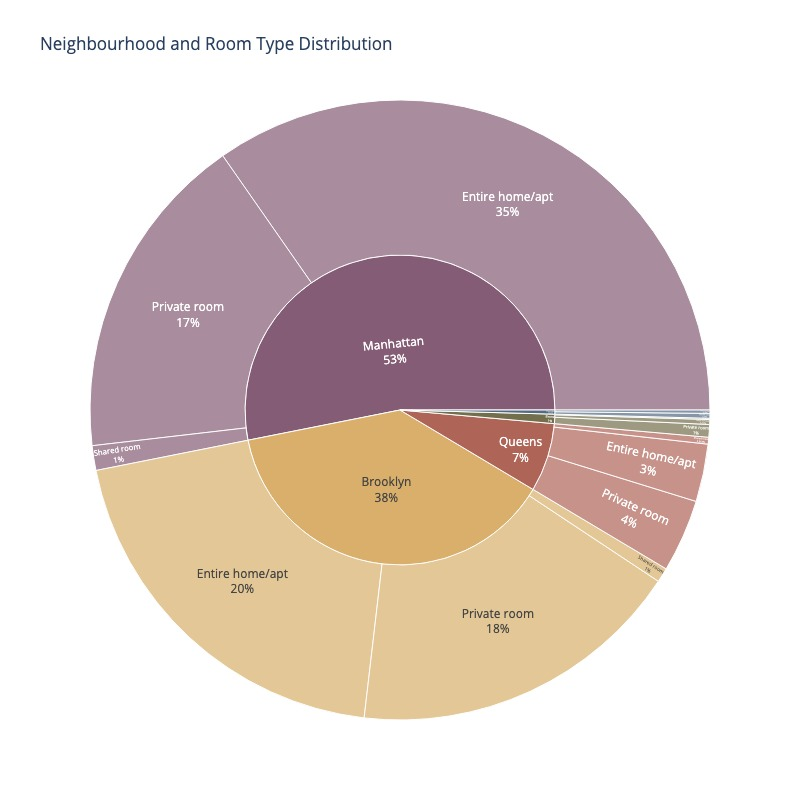

In [14]:
# Visualizing Neighbourhood and Room Type Distribution
fig = px.sunburst(df, path=['neighbourhood', 'room_type'], values='number_of_records',
                  labels= 'number_of_records',color_discrete_sequence=px.colors.qualitative.Antique,
                 title = "Neighbourhood and Room Type Distribution")
fig.update_traces(textinfo="label+percent root")
fig.show('jpg',width=800,height=800)

TAKEAWAYS:
- 91% of rent listings dominated from Manhattan and Brooklyn.
- Entire home/apt is more common on Manhattan and Brooklyn. In Queens, private room is more common than entire home/apt.

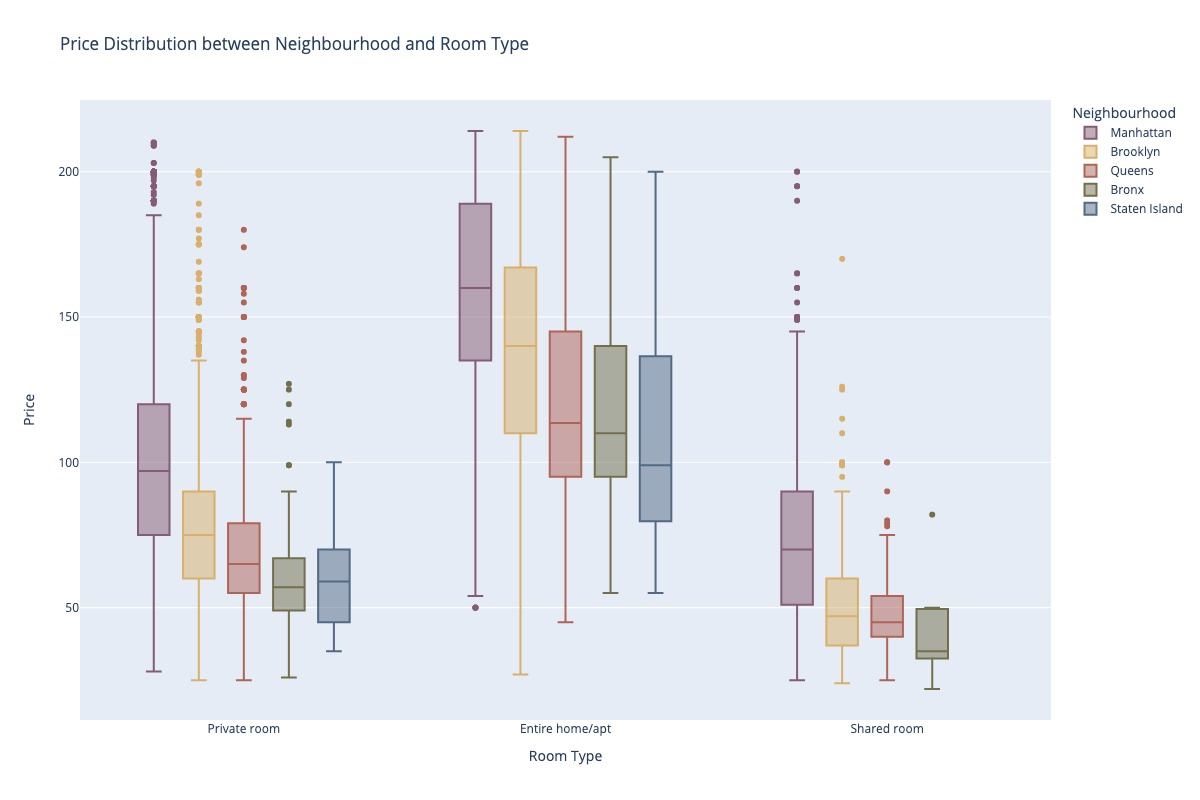

In [19]:
# Remove the outlier of price
df_temp1 = df
z_scores = np.abs((df_temp1['price'] - df_temp1['price'].mean()) / df_temp1['price'].std())
threshold = 2  # Adjust the threshold as needed
df_temp1['price'] = np.where(z_scores > threshold, np.nan, df_temp1['price'])

# Visualizing price distribution between location and room type
fig = px.box(df_temp1,y = "price", x = 'room_type', color = 'neighbourhood',
             title = 'Price Distribution between Neighbourhood and Room Type',
             color_discrete_sequence=px.colors.qualitative.Antique)
fig.update_yaxes(title='Price')
fig.update_xaxes(title='Room Type')
fig.update_layout(legend_title_text='Neighbourhood')
fig.show('jpg',width=1200,height=800)

TAKEAWAYS:
- Manhattan is the most expensive across all room type.
- Price for private room in Manhattan nearly the same as entire home in Queens, Staten and Bronx.

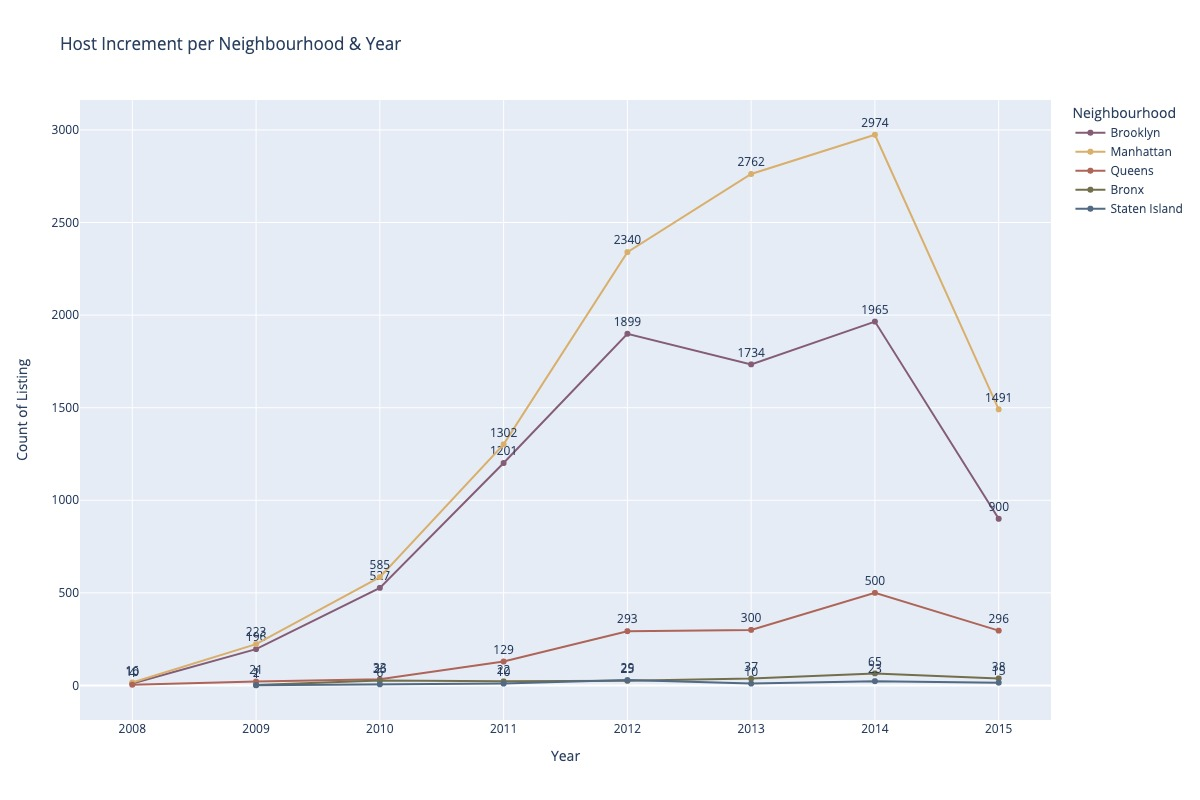

In [25]:
# Visualizing host increment per neighbourhood per yead
df['host_since_date'] = pd.to_datetime(df['host_since'])
df['hs_year'] = df['host_since_date'].dt.year
df['hs_month'] = df['host_since_date'].dt.month
df['hs_day'] = df['host_since_date'].dt.day

group = df.groupby(['hs_year','neighbourhood']).size().reset_index(name='count')
fig = px.line(group, x = "hs_year", y = "count", color = "neighbourhood", text = "count",
              title = 'Host Increment per Neighbourhood & Year',color_discrete_sequence=px.colors.qualitative.Antique)
fig.update_yaxes(title='Count of Listing')
fig.update_xaxes(title='Year')
fig.update_traces(textposition='top center')
fig.update_layout(legend_title_text='Neighbourhood')
fig.show('jpg',width=1200,height=800)

TAKEAWAYS:
- 2014 is the year with most increment rent listings in all neighbourhood.
- On 2015, all neighbourhood faces sharp decline in rent listings increment.